# Part 2

#### A. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set folder path

path = r'C:\Users\shyro\OneDrive\Documents\Instacart Basket Analysis'

In [7]:
# Import orders_products_all.pkl

df_orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [11]:
df_orders_products_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_freq,frequency_flag,Gender,STATE,Age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,High spender,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,High spender,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,High spender,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,High spender,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,High spender,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
df_orders_products_all.shape

(32404859, 32)

#### A. Bar chart

<Axes: >

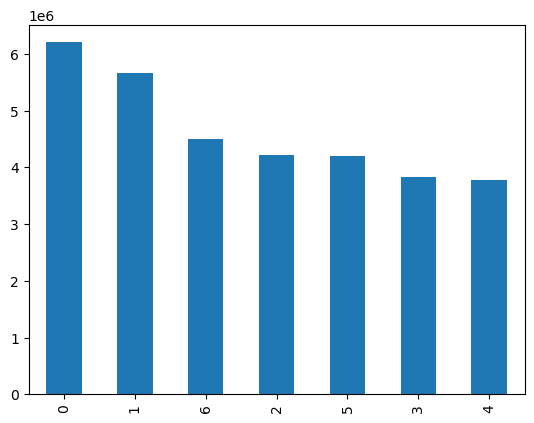

In [13]:
# Create a bar chart

df_orders_products_all['orders_day_of_week'].value_counts().plot.bar()

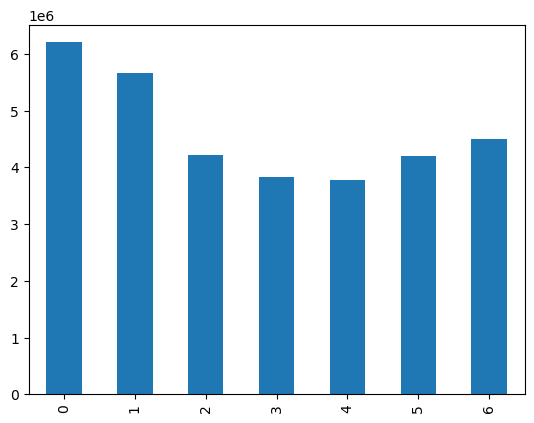

In [15]:
# re-sort bar chart based on index number 

bar = df_orders_products_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

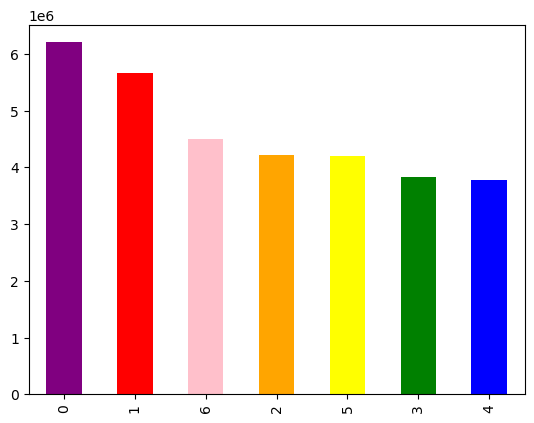

In [17]:
# to add colors in the bar chart 

bar = df_orders_products_all['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

In [18]:
# export bar chart 

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### B. Histogram

<Axes: ylabel='Frequency'>

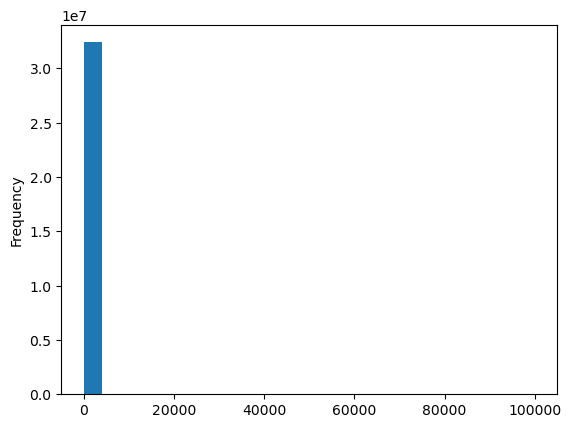

In [20]:
# creating a histogram of the “prices” column

df_orders_products_all['prices'].plot.hist(bins = 25)

In [22]:
# data integrity check

df_orders_products_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [23]:
df_orders_products_all['prices'].mean()

11.980225638383438

In [24]:
df_orders_products_all['prices'].median()

7.4

In [25]:
df_orders_products_all['prices'].max()

99999.0

##### Observation: having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

In [28]:
# run data integrity on price exceeding $100

df_orders_products_all.loc[df_orders_products_all['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_freq,frequency_flag,Gender,STATE,Age,date_joined,no_of_dependants,marital_status,income
7805,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,High spender,30.0,Non-frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,High spender,30.0,Non-frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,High spender,30.0,Non-frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,prior,27,2,19,8.0,33664,2,0,...,High spender,30.0,Non-frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,High spender,30.0,Non-frequent customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,High spender,14.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,High spender,30.0,Non-frequent customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,High spender,30.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,High spender,22.0,Non-frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880


In [29]:
# to turn prices over $100 to NaNs

df_orders_products_all.loc[df_orders_products_all['prices'] >100, 'prices'] = np.nan

In [30]:
# check max price

df_orders_products_all['prices'].max()

25.0

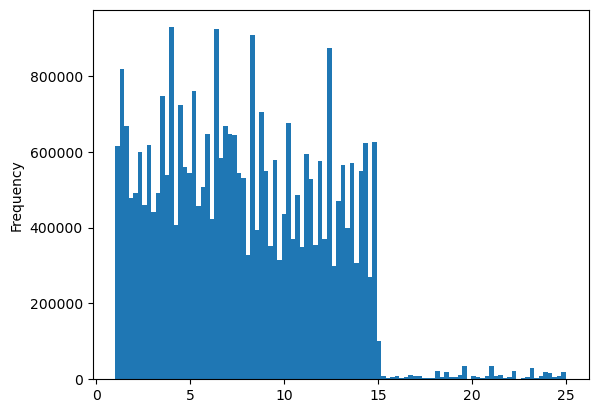

In [47]:
# run new histogram of the “prices” column

hist = df_orders_products_all['prices'].plot.hist(bins = 100)

In [48]:
# export histogram chart 

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### C. Scatterplot

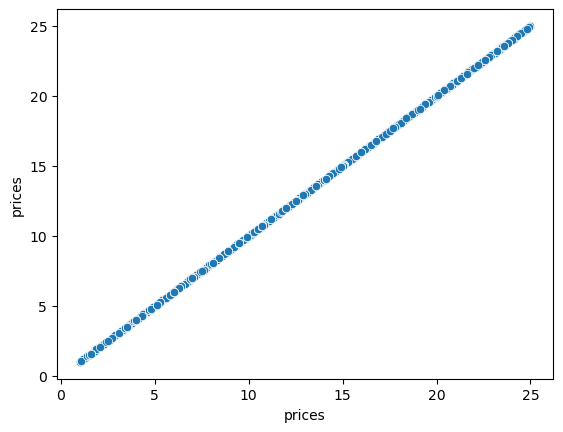

In [80]:
# create scatterplot for prices

scatterplot_price = sns.scatterplot(x = 'prices', y = 'prices',data = df_orders_products_all)

In [ ]:
# export price scatterplot

scatterplot_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_price.png'))

#### D. Subsetting

In [33]:
# create a 70/30 sample

np.random.seed(4)
dev = np.random.rand(len(df_orders_products_all)) <= 0.7

In [34]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [35]:
# get the length of the dataframe df_orders_products_all

len(df_orders_products_all)

32404859

In [36]:
# produce 32404859 random numbers

np.random.rand(32404859)

array([0.93546686, 0.06557465, 0.85698584, ..., 0.98164239, 0.6098637 ,
       0.78601523])

In [37]:
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).

dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
# create a list holding True/False values to the test np.random.rant() <=0.7

dev = np.random.rand(len(df_orders_products_all)) <=0.7

In [39]:
# Store 70% of the sample in the dataframe big

big = df_orders_products_all[dev]

In [40]:
# Store 30% of of the sample in the dataframe small

small = df_orders_products_all[~dev]

In [41]:
# Check len of dataframe

len(df_orders_products_all)

32404859

In [42]:
# check the len of big and small dataframes

len(big) + len(small)

32404859

In [43]:
# reduce your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” 

df_orders_products_all_2 = small[['orders_day_of_week','prices']]

#### E. Line chart

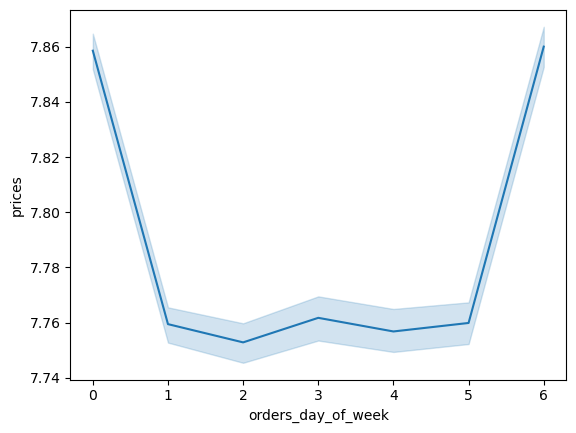

In [44]:
# create a line chart for df_orders_products_all_2 dataframe

line = sns.lineplot(data = df_orders_products_all_2, x = 'orders_day_of_week',y = 'prices')

In [51]:
# export price line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices.png'))

#### F.  Create a histogram of the “order_hour_of_day” column.

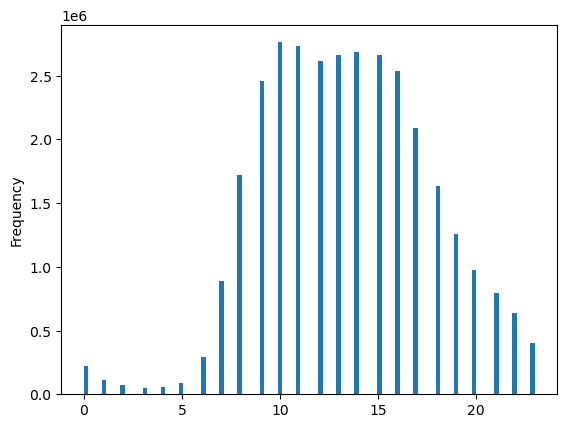

In [49]:
# creating a histogram of the “order_hour_of_day” column

hist_2 = df_orders_products_all['order_hour_of_day'].plot.hist(bins = 100)

##### The histogram demostrates that order peaks at 10 am and lasts until about 5 pm. After 5 pm, the order starts declining. 

In [50]:
# export order_hour_of_day histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### G. Create a bar chart from the “loyalty_flag” column.

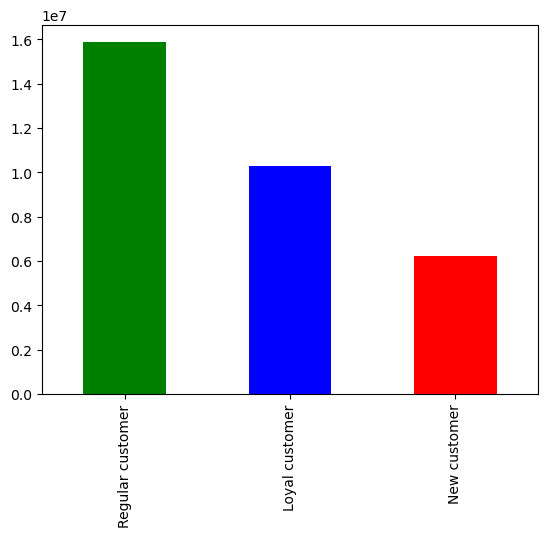

In [56]:
# Create a bar chart from the loyalty_flag column

bar_2 = df_orders_products_all['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'red'])

In [57]:
# export bar chart 

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

#### H. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [61]:
# reduce your samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.” 

df_orders_products_all_3 = small[['order_hour_of_day','prices']]

In [63]:
# check new subset 

df_orders_products_all_3.head()

,order_hour_of_day,prices
1,7,9.0
4,15,9.0
6,9,9.0
9,8,9.0
11,8,4.4


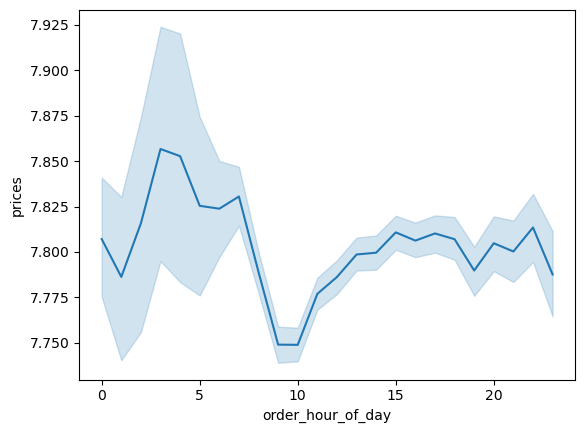

In [62]:
# create a line chart for df_orders_products_all_3 dataframe

line_2 = sns.lineplot(data = df_orders_products_all_3, x = 'order_hour_of_day',y = 'prices')

In [64]:
# export price and order_hour_of_day line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices_order_hour_of_day.png'))

#### I. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [66]:
# reduce your samples to only those columns necessary for the chart, namely “age” and “no_of_dependants.” 

df_orders_products_all_4 = small[['Age','no_of_dependants']]

In [67]:
# check new subset 

df_orders_products_all_4.head()

,Age,no_of_dependants
1,31,3
4,31,3
6,31,3
9,31,3
11,31,3


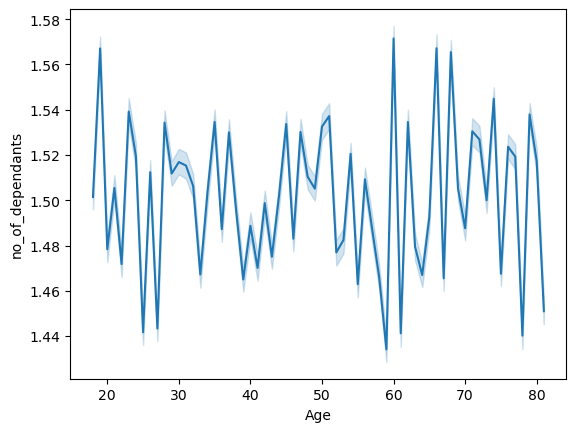

In [68]:
# create a line chart for df_orders_products_all_4 dataframe

line_3 = sns.lineplot(data = df_orders_products_all_4, x = 'Age',y = 'no_of_dependants')

##### The line chart does not show any conclusive relationship between age and no of dependants. There is no clear relationship between the 2 variables. 

In [69]:
# export age and no_of_dependants line chart

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants.png'))

#### J. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [71]:
# reduce your samples to only those columns necessary for the chart, namely “age” and “income.” 

df_orders_products_all_5 = small[['Age','income']]

In [72]:
df_orders_products_all_5.head()

,Age,income
1,31,40423
4,31,40423
6,31,40423
9,31,40423
11,31,40423


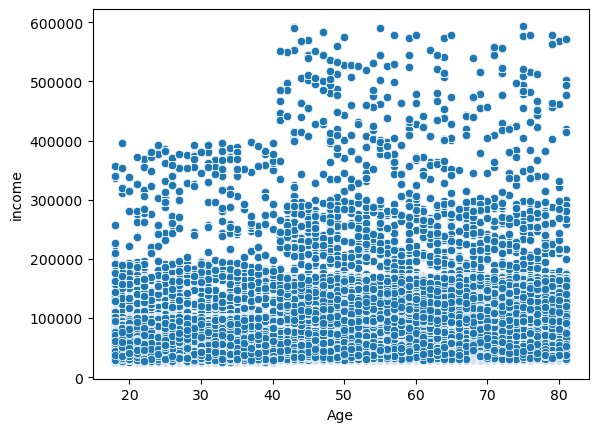

In [76]:
# create scatterplot for age and income

df_orders_products_all_5 = sns.scatterplot(x = 'Age', y = 'income',data = df_orders_products_all_5)

##### The scatterplot shows the direct correlation between age and income. People aged 40 and above start making over 400,000 and above as opposed to those with ages under 40. 

In [77]:
# export age and income scatterplot

df_orders_products_all_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))